In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipynb.fs.full.jean.common._3factorize import appls

ipynb.fs.full.jean.common._2dual_status:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:17: SettingWith

In [2]:
appls.head()

,Numer dokumentu,Data złożenia,Data zamknięcia,Student,Tryb studiów,Typ studiów,Język wykładowy,Kierunek,Status,Rodzaj wniosku,...,Słowo zdrow lub health w uzasadnieniu,Słowo bardzo proszę w uzasadnieniu,Słowo losow w uzasadnieniu,Słowo prac lub work w uzasadnieniu,Słowo obiecuję lub promise w uzasadnieniu,Słowo zobowiązuję w uzasadnieniu,accepted,month,submitted,closed
0,565,2017-10-13 09:26:00,2017-10-14 08:56:00,WqAdrXQFVXEuVFbBNi8ZYw,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,...,False,False,False,True,False,False,True,10,286,287.0
1,111,2017-09-15 17:02:00,2017-09-19 16:05:00,b7uHtLHmJCf40Cj27vMhVg,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,...,True,False,False,False,False,False,False,9,258,262.0
2,294,2017-09-18 22:57:00,2017-09-19 16:27:00,DjOIoCquSJwSIQ96XqbiQ,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Podanie o rejestrację,...,False,False,False,False,False,False,True,9,261,262.0
3,13,2017-09-14 10:16:00,2017-09-15 13:38:00,cKN0GNsJejbI3uFXBTlw,D,I,PL,"Model 2,I,D,PL,7 - Elektromechatronika Pojazdó...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,...,False,False,False,True,False,False,True,9,257,258.0
4,301,2017-09-18 23:29:00,2017-09-19 16:29:00,EJ0ALSHjEfgLOOCgPO0RjA,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,...,False,False,False,False,False,False,True,9,261,262.0


In [3]:
appls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 0 to 5876
Data columns (total 47 columns):
Numer dokumentu                              3078 non-null int64
Data złożenia                                3078 non-null datetime64[ns]
Data zamknięcia                              3077 non-null datetime64[ns]
Student                                      3078 non-null object
Tryb studiów                                 3078 non-null object
Typ studiów                                  3078 non-null object
Język wykładowy                              3078 non-null object
Kierunek                                     3078 non-null object
Status                                       3078 non-null object
Rodzaj wniosku                               3078 non-null object
Osoba przyjmująca                            3072 non-null object
Osoba przypisana                             3078 non-null object
Słowo regulamin w uzasadnieniu               3078 non-null bool
Słowo formaln w uzasad

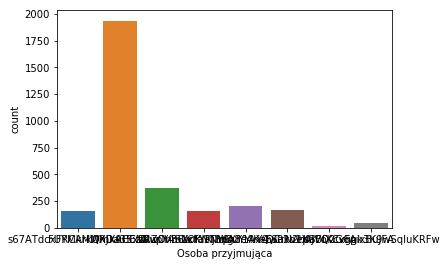

In [4]:
MIN_PROCESSED = 10
filter_outliers = lambda g: g['Status'].count() > MIN_PROCESSED
group = lambda df: df.groupby('Osoba przyjmująca')
filter_out = lambda df: group(df).filter(filter_outliers)
relevant = filter_out(appls)

sns.countplot(relevant['Osoba przyjmująca'])

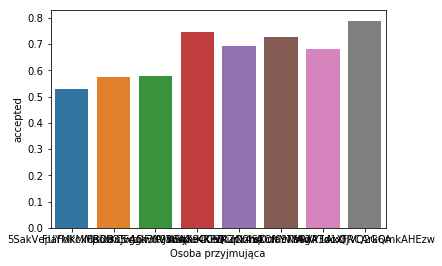

In [5]:
count_per_person = lambda df: group(df)['accepted'].count() 
accepted_ratio = count_per_person(relevant[relevant['accepted'] == True]) / count_per_person(relevant)

plot = sns.barplot(x=accepted_ratio.index, y=accepted_ratio)

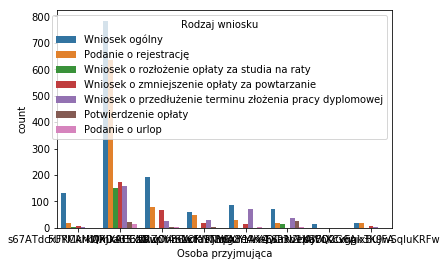

In [5]:
_ = sns.countplot(x='Osoba przyjmująca', hue='Rodzaj wniosku', data=relevant)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


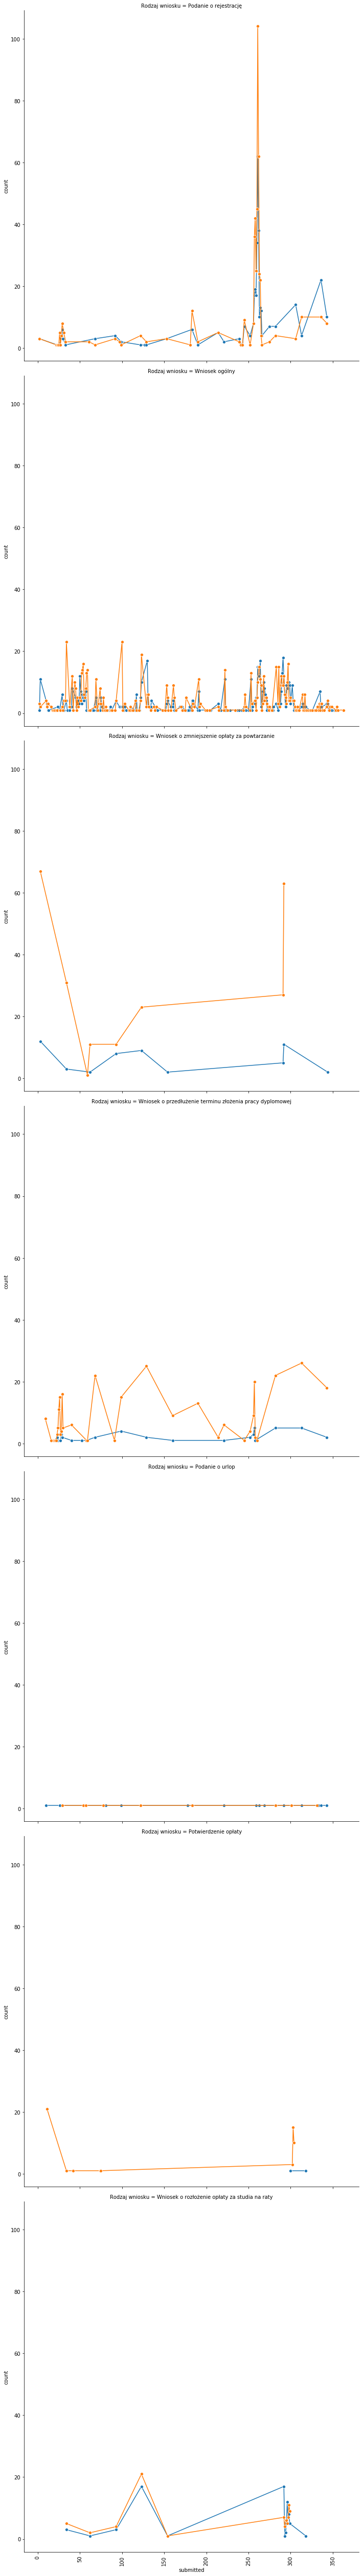

In [6]:
count = appls.groupby(['submitted', 'accepted', 'Rodzaj wniosku'])['submitted'].count()
timeline_data = count.rename('count').reset_index()

grid = sns.FacetGrid(timeline_data, 'Rodzaj wniosku', size=10)
grid.map(sns.lineplot, 'submitted', 'count', 'accepted', marker='o')
_ = plt.xticks(rotation='vertical')